<a href="https://colab.research.google.com/github/ghanalk1/Mobile-Price-Range-Predicition/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Description**
###  In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
###The objective is to find out some relation between features of a mobile phone  (eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description** -

---



### **Battery_power** - Total energy a battery can store in one time measured in mAh
### **Blue** - Has bluetooth or not
### **Clock_speed** - speed at which microprocessor executes instructions
### **Dual_sim** - Has dual sim support or not
### **Fc** - Front Camera mega pixels
### **Four_g** - Has 4G or not
### **Int_memory** - Internal Memory in Gigabytes
### **M_dep** - Mobile Depth in cm
### **Mobile_wt** - Weight of mobile phone
### **N_cores** - Number of cores of processor
### **Pc** - Primary Camera mega pixels
### **Px_height** - Pixel Resolution Height
### **Px_width** - Pixel Resolution Width
### **Ram** - Random Access Memory in Mega Bytes
### **Sc_h** - Screen Height of mobile in cm
### **Sc_w** - Screen Width of mobile in cm
### **Talk_time** - longest time that a single battery charge will last
### **Three_g** - Has 3G or not
### **Touch_screen** - Has touch screen or not
### **Wifi** - Has wifi or not
### **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## **Importing important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/dat/data_mobile_price_range.csv'
df = pd.read_csv(path)

In [4]:
# 'pd.set_option' to show all the columns
pd.set_option("display.max_columns", None)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## **Exploring data**

In [5]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

 #### *The dataset does not have any null values.*


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#### *px_height and sc_w have minimum values equal to 0. This seems weird.*

In [35]:
# target values
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ea086d410>,
      dtype=object)

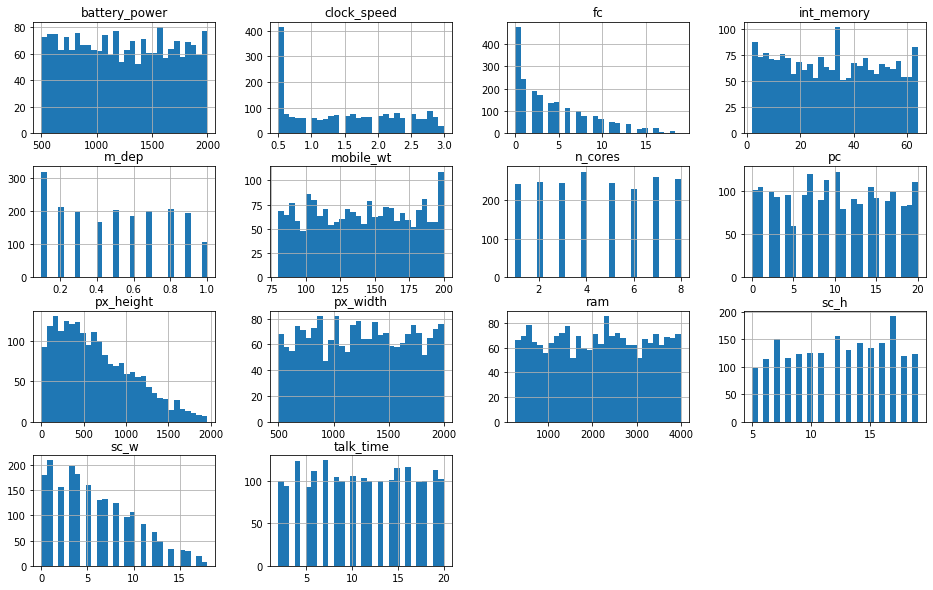

In [8]:
# plotting all columns except categorical ones.
hist_plot = df.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'], axis=1)
hist_plot.hist(figsize=[16,10], bins=30)

### Observing dependence of features on target variable (plotting only ones that show any relation with the target)

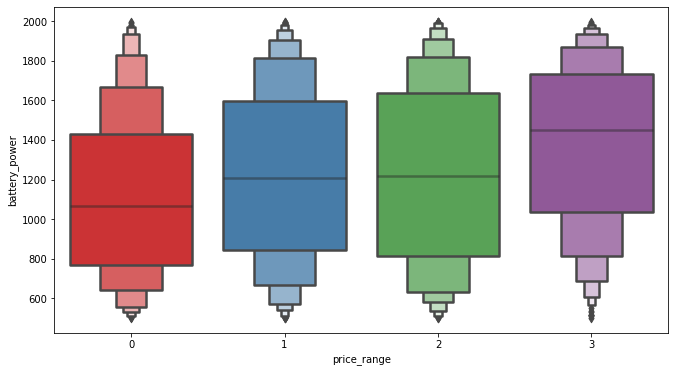

In [9]:
# plotting price range with battery
plt.figure(figsize=[11, 6])
sns.boxenplot(data=df, y='battery_power', x='price_range', palette='Set1', linewidth=2.5)

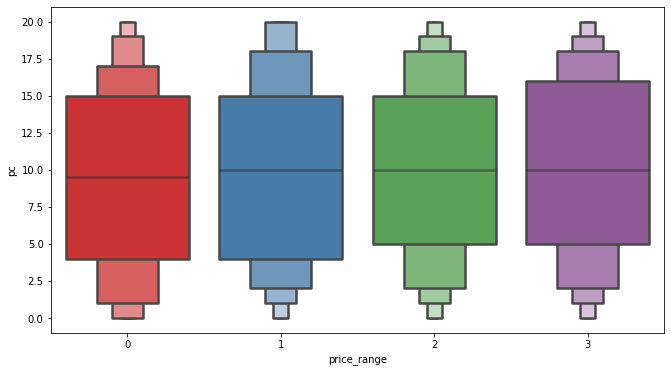

In [10]:
# plotting price range with primary camera
plt.figure(figsize=[11, 6])
sns.boxenplot(data=df, y='pc', x='price_range', palette='Set1', linewidth=2.5)

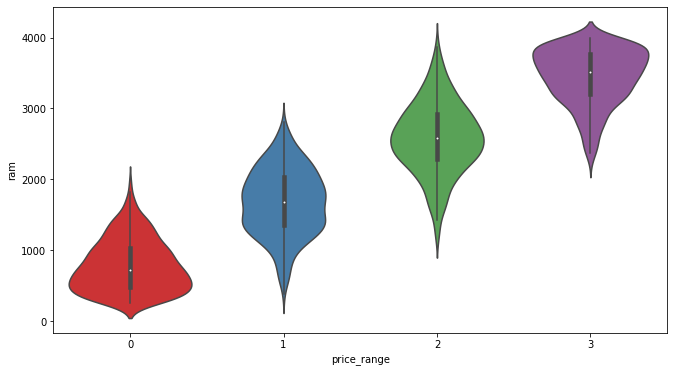

In [11]:
# plotting price range with ram
plt.figure(figsize=[11, 6])
sns.violinplot(data=df, y='ram', x='price_range', palette='Set1')

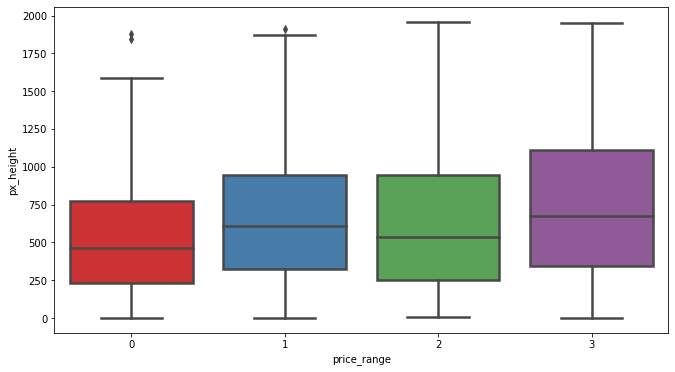

In [12]:
# plotting price range with pixel resolution height
plt.figure(figsize=[11, 6])
sns.boxplot(data=df, y='px_height', x='price_range', palette='Set1', linewidth=2.5)

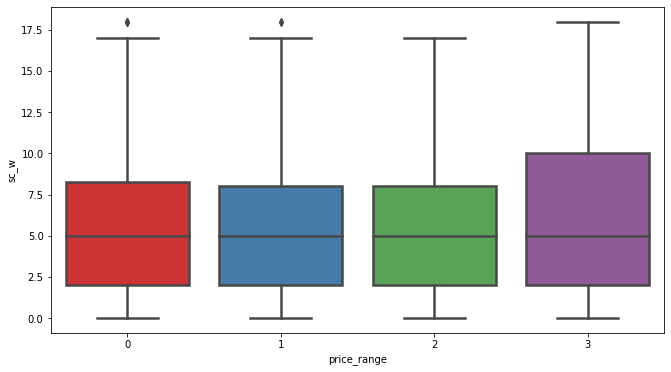

In [13]:
# plotting price range with screen width
plt.figure(figsize=[11, 6])
sns.boxplot(data=df, y='sc_w', x='price_range', palette='Set1', linewidth=2.5)

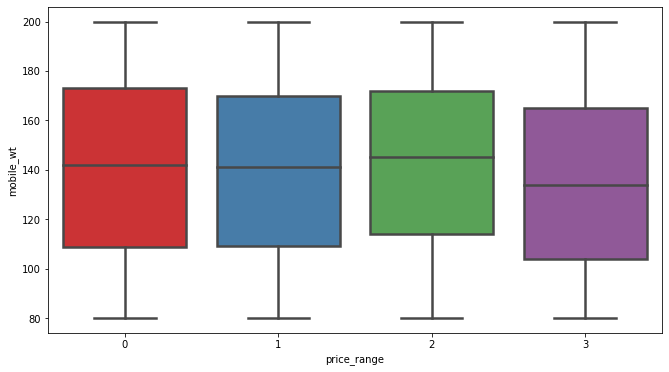

In [14]:
# plotting price range with mobile weight
plt.figure(figsize=[11, 6])
sns.boxplot(data=df, y='mobile_wt', x='price_range', palette='Set1', linewidth=2.5)

### conclusions:


*   *Replatively expensive phones have higher capacity batteries.*
*  *Most expensive (category 3) phones have better cameras.*

*   *Relatively expensive phones have much bigger rams.*
*   *Expensive phones have better screen quality.*

*   *Most expensive phones have wider screens.*
*   *Most exxpensive phones are lighter than the competition.*







## **Feature Engineering**

## Checking Multicollinearity

In [15]:
# making a copy of our dataset
df_1 = df.copy()

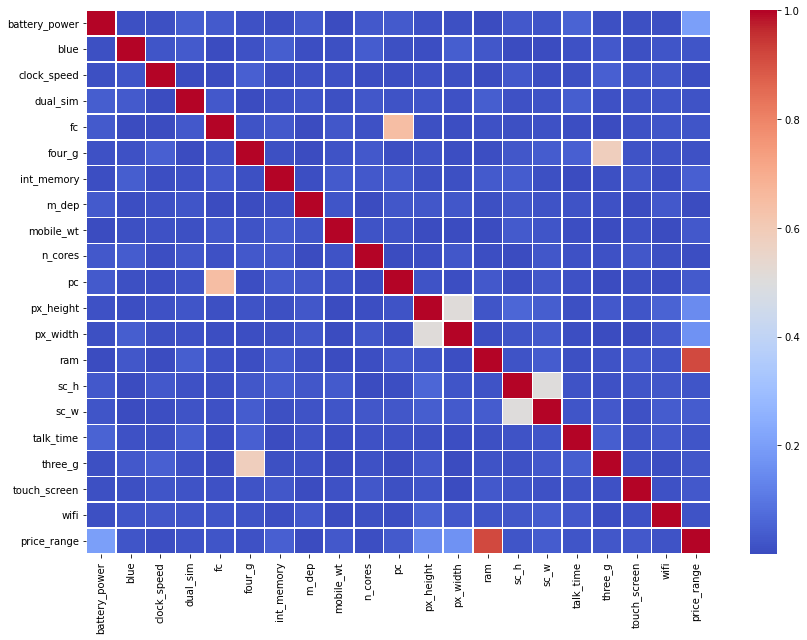

In [16]:
# heatmap for checking multi-collinearity
plt.figure(figsize=[14,10])
sns.heatmap(data=abs(df_1.corr()), annot=False, cmap='coolwarm', linewidths=0.5)

In [17]:
# calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  # the independent variables set
  X = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
check_vif(df_1)

          feature        VIF
0   battery_power   9.852329
1            blue   1.987643
2     clock_speed   4.353409
3        dual_sim   2.038823
4              fc   3.413647
5          four_g   3.194364
6      int_memory   3.979406
7           m_dep   3.952634
8       mobile_wt  14.709826
9         n_cores   4.707757
10             pc   6.251274
11      px_height   4.626185
12       px_width  12.018345
13            ram  39.806450
14           sc_h  11.817054
15           sc_w   3.721933
16      talk_time   4.916936
17        three_g   6.219108
18   touch_screen   2.000108
19           wifi   2.035796
20    price_range  25.874258


In [19]:
#df_1['screen_resolution'] = df_1['px_height'] * df_1['px_width']

In [20]:
#df_1['screen_area'] = df_1['sc_h'] * df_1['sc_w']

In [21]:
#df_1.drop(['px_height', 'px_width', 'sc_h', 'sc_w'], axis=1, inplace=True)

In [22]:
#check_vif(df_1)

*Tried dropping and transforming some features but the **VIF** score didn't improve. We cannot transform any further as all features are important.*

## Checking for outliers

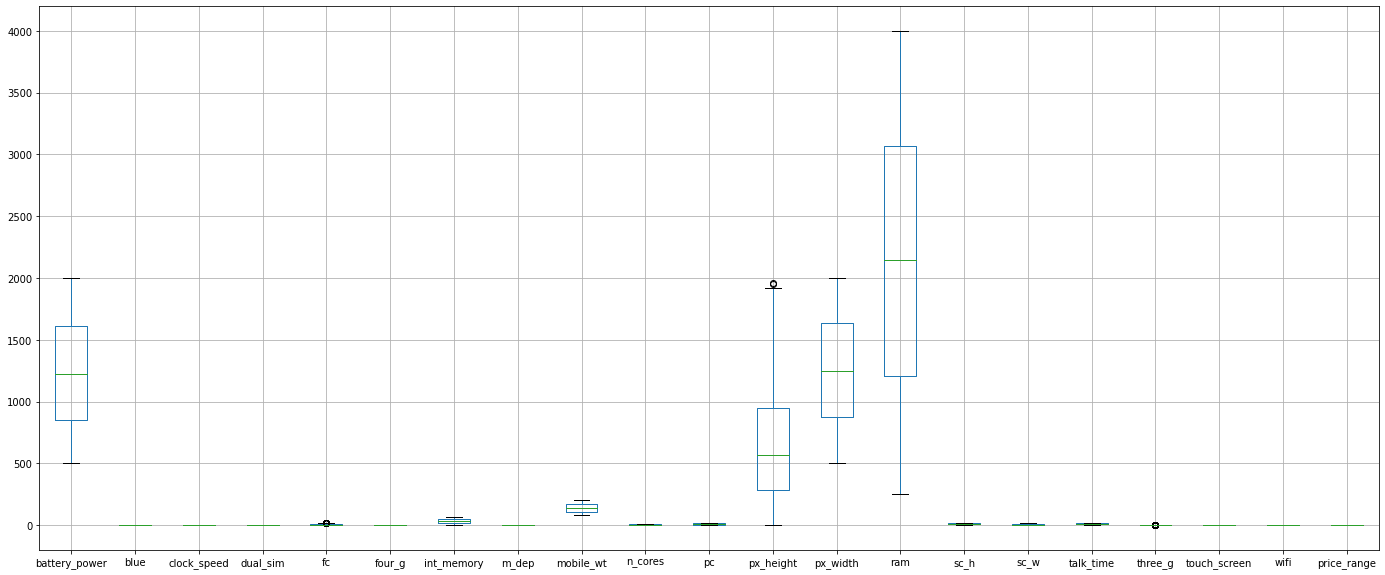

In [31]:
plt.figure(figsize=(24,10))
df_1.boxplot()

## Seperating dependent and independent variables

In [23]:
# seperating independent and dependent variables
X = df_1.drop(['price_range'],axis=1)
y = df_1['price_range']

In [24]:
X.shape

(2000, 20)

In [25]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [26]:
# splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Scaling the data

In [32]:
# scaling the variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Predicting price range using SVM classifier.**

In [34]:
from pandas.core.common import random_state
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=2)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=2)